# Books Recommendation System Project
### In this project we will be working with a Books data set, We will build a recommender system that suggest books to the user based on they previous rating on the other books.
**by using GoodReads API**

**This is The Link of API : https://www.goodreads.com/api**

## This data set contains the following features:
>   
   -  id : The Book ID
   -  title : The Book Title
   - rating : The rating given to the book
   - user : The User ID
   

#### import  packages and set plots to be embedded inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Gathering Data

In [2]:
df1 = pd.read_csv(r'Books1.csv').drop('Unnamed: 0',axis=1)
df2 = pd.read_csv(r'Books2.csv')
df3 = pd.read_csv(r'Books3.csv')

In [3]:
df1.head()

,id,title,rating,user
0,29056083,Harry Potter and the Cursed Child: Parts One a...,0,0
1,11125,Digital Fortress,4,0
2,976,Deception Point,4,0
3,6411961,"The Lost Symbol (Robert Langdon, #3)",4,0
4,968,"The Da Vinci Code (Robert Langdon, #2)",4,0


In [4]:
df2.head()

,id,title,rating,user
0,9686929,Strength Of Materials: Mechanics Of Solids,0,747
1,1843479,Structural Analysis,0,747
2,2180122,"Solutions Manual to Accompany Crandall, Dahl a...",0,747
3,1497532,Atlas of Men: A guide for somatotyping the adu...,0,749
4,2110937,Vadim (Constantin Vadim #3),0,750


In [5]:
df3.head()

,id,title,rating,user
0,234225,"Dune (Dune Chronicles, #1)",0,3840
1,11507,My Name Is Asher Lev,5,3840
2,4069,Man's Search for Meaning,5,3840
3,7624,Lord of the Flies,4,3840
4,157993,The Little Prince,4,3840


In [6]:
# set all data in one data Frame
df = pd.concat([df1,df2,df3])

In [7]:
df.head()

,id,title,rating,user
0,29056083,Harry Potter and the Cursed Child: Parts One a...,0,0
1,11125,Digital Fortress,4,0
2,976,Deception Point,4,0
3,6411961,"The Lost Symbol (Robert Langdon, #3)",4,0
4,968,"The Da Vinci Code (Robert Langdon, #2)",4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47390 entries, 0 to 19564
Data columns (total 4 columns):
id        47390 non-null int64
title     47390 non-null object
rating    47390 non-null int64
user      47390 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


In [9]:
df.shape

(47390, 4)

In [10]:
# show the statistical summary about our rating column 
df['rating'].describe()

count    47390.000000
mean         1.980840
std          2.158488
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

## showing the top 10 rating books 

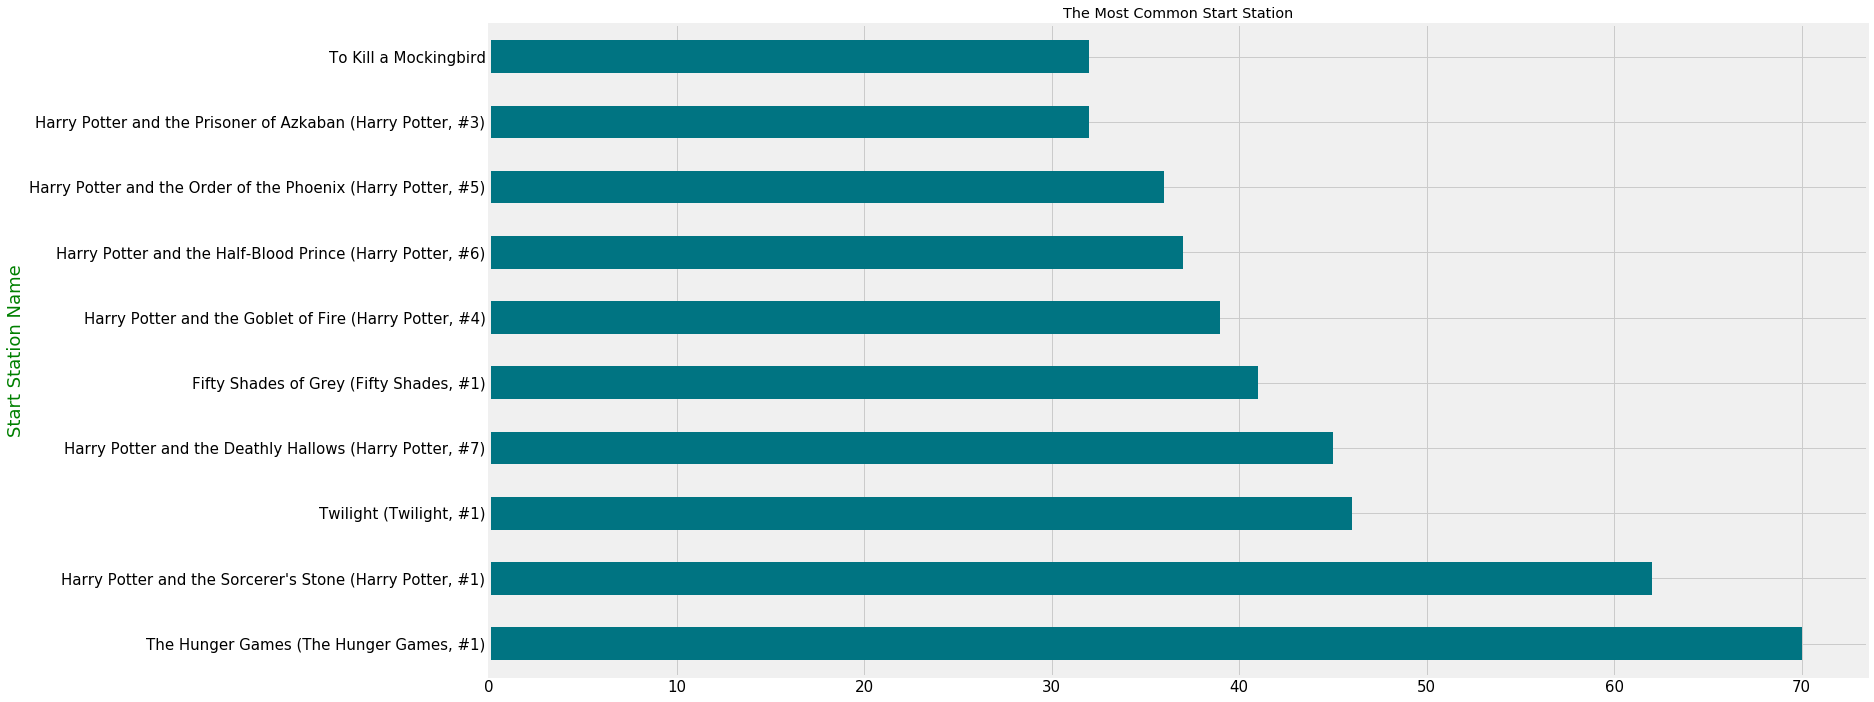

In [11]:
g = df[df['rating'] == 5]['title'].value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Start Station')

#x-label
ax.set_ylabel('Start Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

## These are the top rating books on the website 

>    - 'The Hunger Games (The Hunger Games, #1)'
    - "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
    - 'Twilight (Twilight, #1)'
    - 'Harry Potter and the Deathly Hallows (Harry Potter, #7)'
    - 'Fifty Shades of Grey (Fifty Shades, #1)'
    - 'Harry Potter and the Goblet of Fire (Harry Potter, #4)'
    - 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)'
    - 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)'
    - 'To Kill a Mockingbird'
    - 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)'

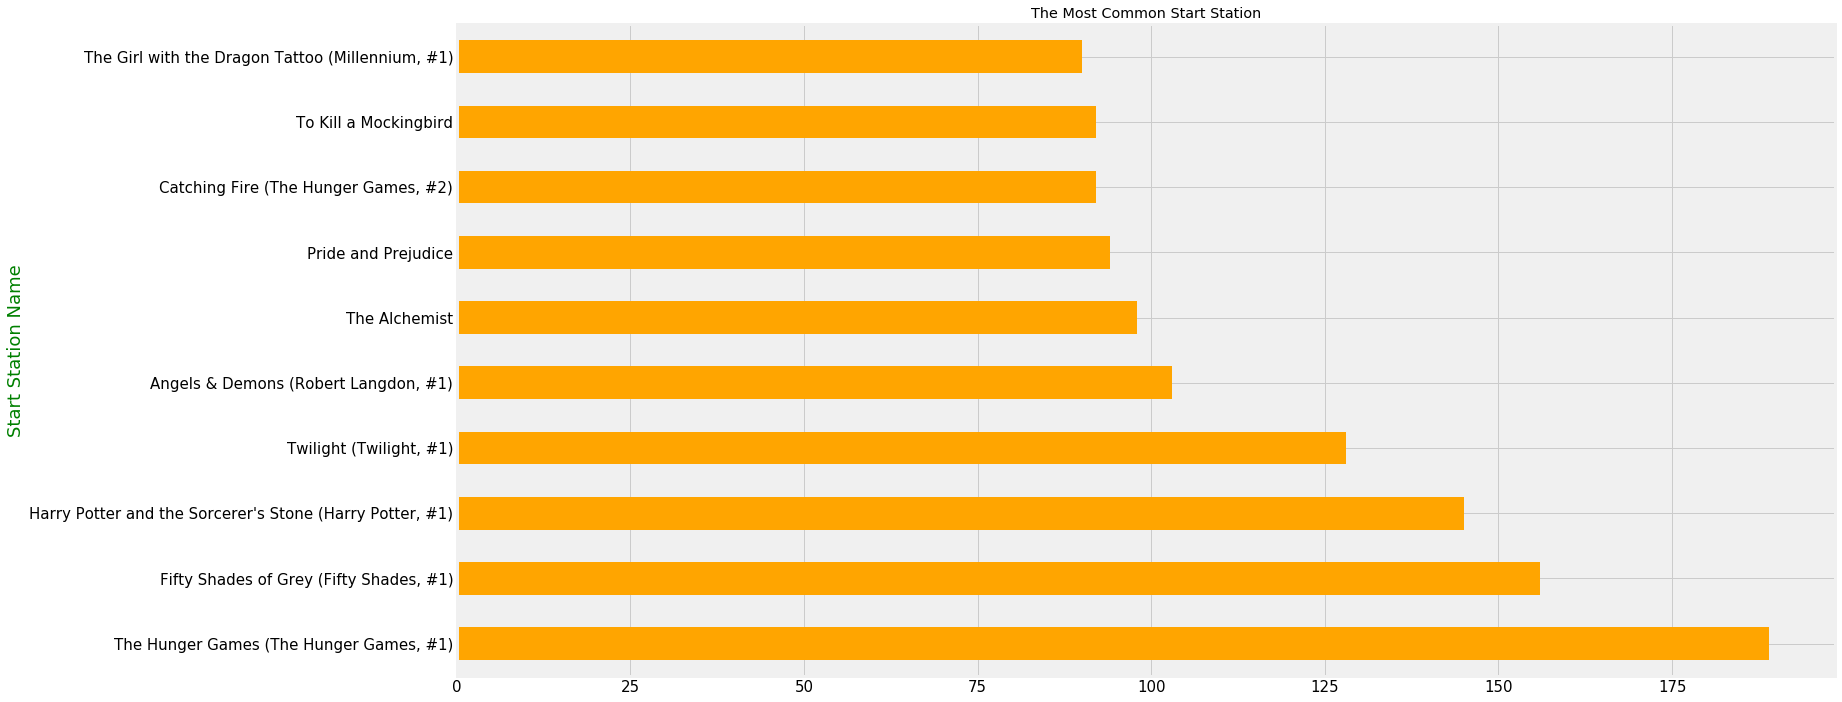

In [12]:
g = df.title.value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#FFA500', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Start Station')

#x-label
ax.set_ylabel('Start Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

## These are the books that have received a large number of reviews from users

>    - 'The Hunger Games (The Hunger Games, #1)'
    - 'Fifty Shades of Grey (Fifty Shades, #1)'
    - "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
    - 'Twilight (Twilight, #1)'
    - 'Angels & Demons (Robert Langdon, #1)'
    - 'The Alchemist'
    - 'Pride and Prejudice'
    - 'To Kill a Mockingbird'
    - 'Catching Fire (The Hunger Games, #2)'
    - 'The Girl with the Dragon Tattoo (Millennium, #1)'

**lets show the most review which More frequent**

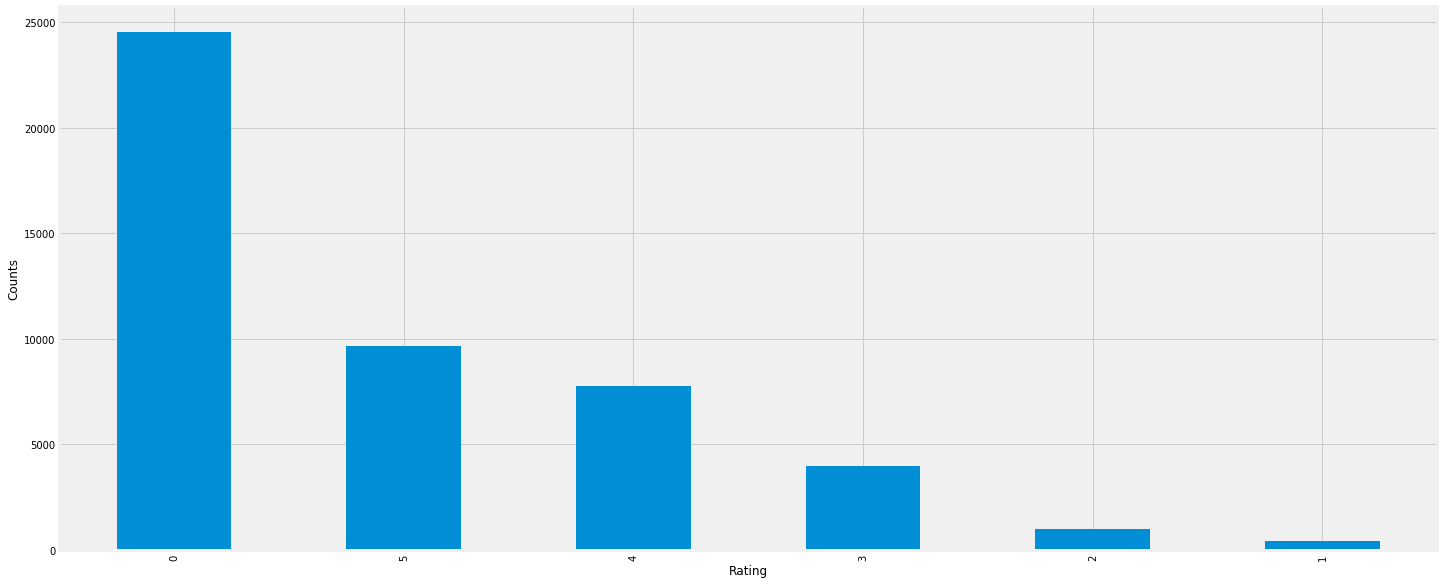

In [13]:
plt.figure(figsize=(22,10))
df['rating'].value_counts().plot('bar')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [14]:
user_1 = df['user'].value_counts().index[0]

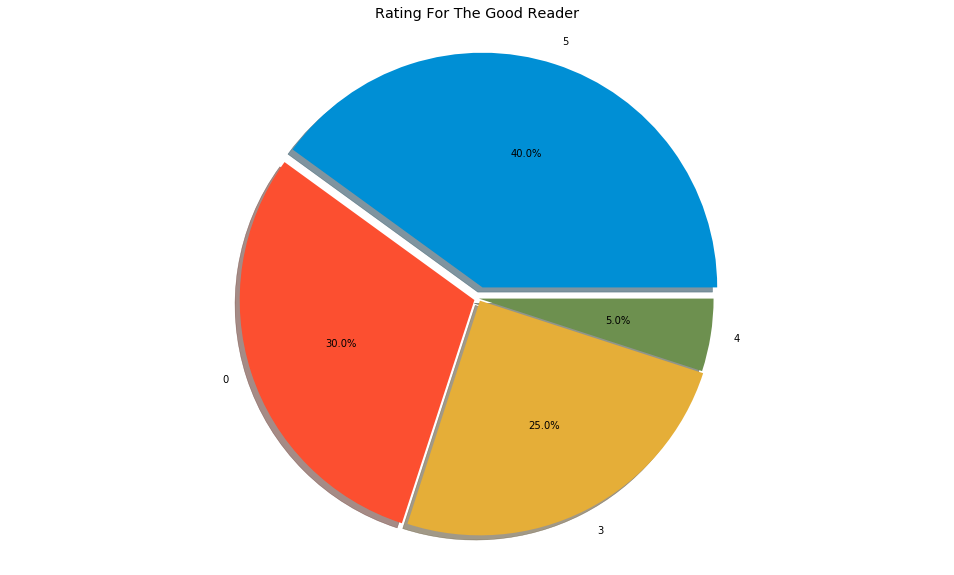

In [15]:
plt.figure(figsize=(15,10))
label=['5','0','3','4']
plt.pie(df[df['user'] == user_1]['rating'].value_counts(),explode=[0.05,0.02,0.01,0],labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Rating For The Good Reader')
plt.show()

In [16]:
# group by title to calculate number of rating for each book 
dff = df.groupby('title',as_index=False)['rating'].count()
dff = dff.rename(columns={'rating':'rating_count'})

In [17]:
# merge the data on title 
df = pd.merge(df,dff,on='title')

# now it's time to get the books that have more than 5 reviews 

In [18]:
df = df.query('rating_count >= 5').reset_index(drop=True)

**delete the duplicates in title users**

**make a pivot table Format the data as appropriate**

In [19]:
df_item = df.drop_duplicates(['title','user']).pivot(index='title',columns='user',values='rating').fillna(0)

In [20]:
df_item

user,0,3,4,6,8,9,10,12,13,18,...,6735,6737,6738,6747,6750,6753,6770,6771,6773,6776
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,000 Places to See Before You Die",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11/22/63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Q84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1Q84 (1Q84, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1st to Die (Women's Murder Club, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 States: The Story of My Marriage,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# import csr_matrix 
from scipy.sparse import csr_matrix

In [22]:
# convert df_Iitem to sparse matrix
df_sparse = csr_matrix(df_item)

**Sparse matrix is a matrix which contains very few non-zero elements**

## Import NearestNeighbors model

In [23]:
from sklearn.neighbors import NearestNeighbors

**fit the data and select the matric to be cosine**

**Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis**

In [24]:
knn = NearestNeighbors(metric='cosine',algorithm='brute')

In [25]:
knn.fit(df_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [26]:
# select a random index to set a recommendation 
query_index = np.random.choice(df_item.shape[0])
print(query_index)
distances, indices = knn.kneighbors(df_item.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

344


In [27]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_item.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_item.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Furiously Happy: A Funny Book About Horrible Things:

1: The Lowland, with distance of 0.4478423696257673:
2: In the Unlikely Event, with distance of 0.5149287499273342:
3: The Rosie Project (Don Tillman, #1), with distance of 0.6428571428571428:
4: Let's Pretend This Never Happened: A Mostly True Memoir, with distance of 0.6876524762227879:
5: Between the World and Me, with distance of 0.6876524762227879:


In [28]:
def book_matching(book_name):
    '''
    this function used to make a recommendation based on the book name
    
    parameters:
        Book_name : take the name of the book
        
    '''
    distances, indices = knn.kneighbors(df_item.loc[book_name,:].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(book_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, df_item.index[indices.flatten()[i]], distances.flatten()[i]))
    plt.figure(figsize=(15,10))
    label= df_item.index[indices.flatten()[1:]]
    plt.pie((1 - distances.flatten()[1:])*100,labels=label,autopct='%.1f%%',shadow=True)
    plt.axis('equal')
    plt.title('The Best Matching Books')
    plt.show()
    

Recommendations for Harry Potter and the Sorcerer's Stone (Harry Potter, #1):

1: Harry Potter and the Prisoner of Azkaban (Harry Potter, #3), with distance of 0.5551509218526218:
2: Harry Potter and the Goblet of Fire (Harry Potter, #4), with distance of 0.5838587257814557:
3: Harry Potter and the Deathly Hallows (Harry Potter, #7), with distance of 0.5880328590389384:
4: Harry Potter and the Half-Blood Prince (Harry Potter, #6), with distance of 0.60828310999958:
5: Harry Potter and the Chamber of Secrets (Harry Potter, #2), with distance of 0.6162307236031911:


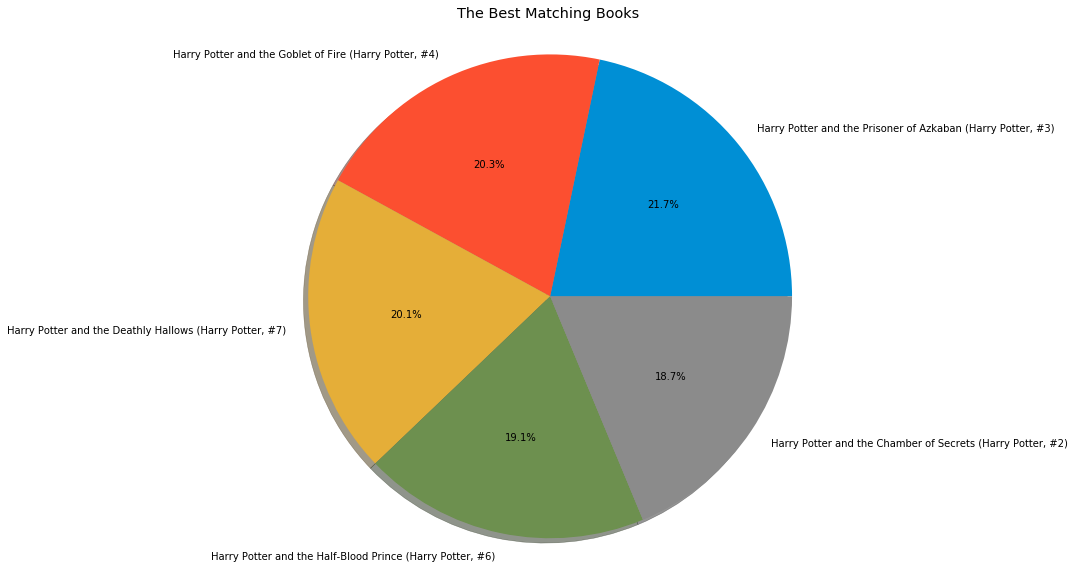

In [29]:
book_matching("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)")

# conclusion
**This is a Collaborative filtering Recommender system that we used to build intelligent recommender systems that can learn to give better recommendations as more information about users is collected.**

**This recommender take a book name and then recommend to you the most relevant books to it**